# **Predicting Credit Card Fraud**

##**Ruchi Joshi**

---

### **Description**
This project uses KNN models with sklearn to predict credit card fraud.


### **Resources Used**
* [Credit Card Fraud Prediction Dataset](https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction)

<br>


In [1]:
#importing all necessary functions and libraries.

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

! pip install opendatasets

<a name = "p1"></a>

---
## **Predicting Credit Card Fraud**
---

The provided dataset offers a variety of attributes for comprehensive analysis on fake and legitamate credit card transactions. Each row represents information about a credit card transaction. This data contains 22 columns:


* `trans_date_trans_time` is the timestamp of the transaction (date and time)
* `cc_num` is the unique customer identification number
* `merchant` is the merchant involved in the transaction
* `category` is the transaction type (e.g., personal, childcare)
* `amt` is the transaction amount
* `first` is the cardholder's first name
* `last` is the cardholder's last name
* `gender` is the cardholder's gender
* `street` is the cardholder's street address
* `city` is the cardholder's city of residence
* `state` is the cardholder's state of residence
* `zip` is the cardholder's zip code
* `lat` is the latitude of the cardholder's location
* `long` is the longitude of cardholder's location
* `city_pop` is the population of the cardholder's city
* `job` is the cardholder's job title
* `dob` is the cardholder's date of birth
* `trans_num` is the unique transaction identifier
* `unix_time` is the transaction timestamp (Unix format)
* `merch_lat` is the merchant's location (latitude)
* `merch_long` is the merchant's location (longtitude)
* `is_fraud` is the ffraudulent transaction indicator (1 = fraud, 0 = legitimate)

#### **Loading the Data**

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['fraud test.csv']))

#### **Data Exploration and Preprocessing**

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.shape

(555719, 23)

In [ ]:
df.isna().sum()

# there are no null values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.duplicated().sum()

# there are no duplicates

0

In [ ]:
df['is_fraud'].value_counts()

 #the dataset dataset is unbalanced, so it is necessary to drop values in order to balance it

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [ ]:
#creating a new dataset with an equal number of legit and fraudulant transaction

legit = df[df.is_fraud == 0]
fraud = df[df.is_fraud == 1]

legit_sample = legit.sample(n=2145)

creditcard_df = pd.concat([legit_sample, fraud], axis = 0)

In [ ]:
creditcard_df.shape

(4290, 23)

In [ ]:
creditcard_df['is_fraud'].value_counts()

is_fraud
0    2145
1    2145
Name: count, dtype: int64

In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4290 entries, 219847 to 517571
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4290 non-null   int64  
 1   trans_date_trans_time  4290 non-null   object 
 2   cc_num                 4290 non-null   float64
 3   merchant               4290 non-null   object 
 4   category               4290 non-null   object 
 5   amt                    4290 non-null   float64
 6   first                  4290 non-null   object 
 7   last                   4290 non-null   object 
 8   gender                 4290 non-null   object 
 9   street                 4290 non-null   object 
 10  city                   4290 non-null   object 
 11  state                  4290 non-null   object 
 12  zip                    4290 non-null   int64  
 13  lat                    4290 non-null   float64
 14  long                   4290 non-null   float64
 15  ci

#### **Splitting the Data**

In [ ]:
#splitting the data into a training and test set using `cc_num','amt', 'city_pop', 'unix_time', and 'zip' as the features to predict `is fraud`

inputs = creditcard_df[['cc_num','amt', 'city_pop', 'unix_time', 'zip']]
output = creditcard_df["is_fraud"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size=0.2, random_state=42)

#### **Scaling the Features**

In [ ]:
#creating a standardized version of the training and test data

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [ ]:
#creating a normalized version of the training and test data

norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

#### **Modelling the Data**

To be particularly thorough and rigorous in this process, 10-Folds CV will be perofrmed on the following models:

* 1NN on unscaled data.
* 1NN on standardized data.
* 1NN on normalized data.

* 2NN on unscaled data.
* 2NN on standardized data.
* 2NN on normalized data.

* 3NN on unscaled data.
* 3NN on standardized data.
* 3NN on normalized data.

* 5NN on unscaled data.
* 5NN on standardized data.
* 5NN on normalized data.

* 33NN on unscaled data. **NOTE**: $\sqrt{\text{length of training data}} \approx 33$
* 33NN on standardized data.
* 33NN on normalized data.



In [ ]:
# 1NN on unscaled data

knn_1_unscaled = KNeighborsClassifier(n_neighbors = 1)

scores_1_unscaled = cross_val_score(knn_1_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_unscaled.mean()) + " +/- " + str(scores_1_unscaled.std()))

10-Folds CV Scores: 0.9388068682622551 +/- 0.00905745526081218


In [ ]:
# 1NN on standardized data

knn_1_std = KNeighborsClassifier(n_neighbors = 1)

scores_1_std = cross_val_score(knn_1_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_std.mean()) + " +/- " + str(scores_1_std.std()))

10-Folds CV Scores: 0.8962734761678759 +/- 0.020645193488937473


In [ ]:
# 1NN on normalized data

knn_1_norm = KNeighborsClassifier(n_neighbors = 1)

scores_1_norm = cross_val_score(knn_1_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_norm.mean()) + " +/- " + str(scores_1_norm.std()))

10-Folds CV Scores: 0.901816224828802 +/- 0.017226001477361374


In [ ]:
# 2NN on unscaled data

knn_2_unscaled = KNeighborsClassifier(n_neighbors = 2)

scores_2_unscaled = cross_val_score(knn_2_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_2_unscaled.mean()) + " +/- " + str(scores_2_unscaled.std()))

10-Folds CV Scores: 0.9332768323276154 +/- 0.01020634573905166


In [ ]:
# 2NN on standardized data

knn_2_std = KNeighborsClassifier(n_neighbors = 2)

scores_2_std = cross_val_score(knn_2_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_2_std.mean()) + " +/- " + str(scores_2_std.std()))

10-Folds CV Scores: 0.8916096006508916 +/- 0.01881984824228378


In [ ]:
# 2NN on normalized data

knn_2_norm = KNeighborsClassifier(n_neighbors = 2)

scores_2_norm = cross_val_score(knn_2_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_2_norm.mean()) + " +/- " + str(scores_2_norm.std()))

10-Folds CV Scores: 0.8924901688250051 +/- 0.017643012063470617


In [ ]:
# 3NN on unscaled data

knn_3_unscaled = KNeighborsClassifier(n_neighbors = 3)

scores_3_unscaled = cross_val_score(knn_3_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_3_unscaled.mean()) + " +/- " + str(scores_3_unscaled.std()))

10-Folds CV Scores: 0.881997084548105 +/- 0.016313229273052506


In [ ]:
# 3NN on standardized data

knn_3_std = KNeighborsClassifier(n_neighbors = 3)

scores_3_std = cross_val_score(knn_3_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_3_std.mean()) + " +/- " + str(scores_3_std.std()))

10-Folds CV Scores: 0.875003390060343 +/- 0.019677427128358814


In [ ]:
# 3NN on normalized data

knn_3_norm = KNeighborsClassifier(n_neighbors = 3)

scores_3_norm = cross_val_score(knn_3_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_3_norm.mean()) + " +/- " + str(scores_3_norm.std()))

10-Folds CV Scores: 0.8747126923859245 +/- 0.013935439025100084


In [ ]:
# 5NN on unscaled data

knn_5_unscaled = KNeighborsClassifier(n_neighbors = 5)

scores_5_unscaled = cross_val_score(knn_5_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_unscaled.mean()) + " +/- " + str(scores_5_unscaled.std()))

10-Folds CV Scores: 0.8304173164282325 +/- 0.016657394996053655


In [ ]:
# 5NN on standardized data

knn_5_std = KNeighborsClassifier(n_neighbors = 5)

scores_5_std = cross_val_score(knn_5_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_std.mean()) + " +/- " + str(scores_5_std.std()))

10-Folds CV Scores: 0.8572318462268628 +/- 0.011287646938586934


In [ ]:
# 5NN on normalized data

knn_5_norm = KNeighborsClassifier(n_neighbors = 5)

scores_5_norm = cross_val_score(knn_5_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_norm.mean()) + " +/- " + str(scores_5_norm.std()))

10-Folds CV Scores: 0.8563538205980066 +/- 0.011928570824684803


In [ ]:
# 33NN on unscaled data

knn_33_unscaled = KNeighborsClassifier(n_neighbors = 33)

scores_33_unscaled = cross_val_score(knn_33_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_33_unscaled.mean()) + " +/- " + str(scores_33_unscaled.std()))

10-Folds CV Scores: 0.6078115465455285 +/- 0.024064136987606812


In [ ]:
# 33NN on standardized data

knn_33_std = KNeighborsClassifier(n_neighbors = 33)

scores_33_std = cross_val_score(knn_33_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_33_std.mean()) + " +/- " + str(scores_33_std.std()))

10-Folds CV Scores: 0.83856956403824 +/- 0.023630642697326187


In [ ]:
# 33NN on normalized data

knn_33_norm = KNeighborsClassifier(n_neighbors = 33)

scores_33_norm = cross_val_score(knn_33_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_33_norm.mean()) + " +/- " + str(scores_33_norm.std()))

10-Folds CV Scores: 0.8006924198250729 +/- 0.019189765158115463


#### **Visualizing the scores**


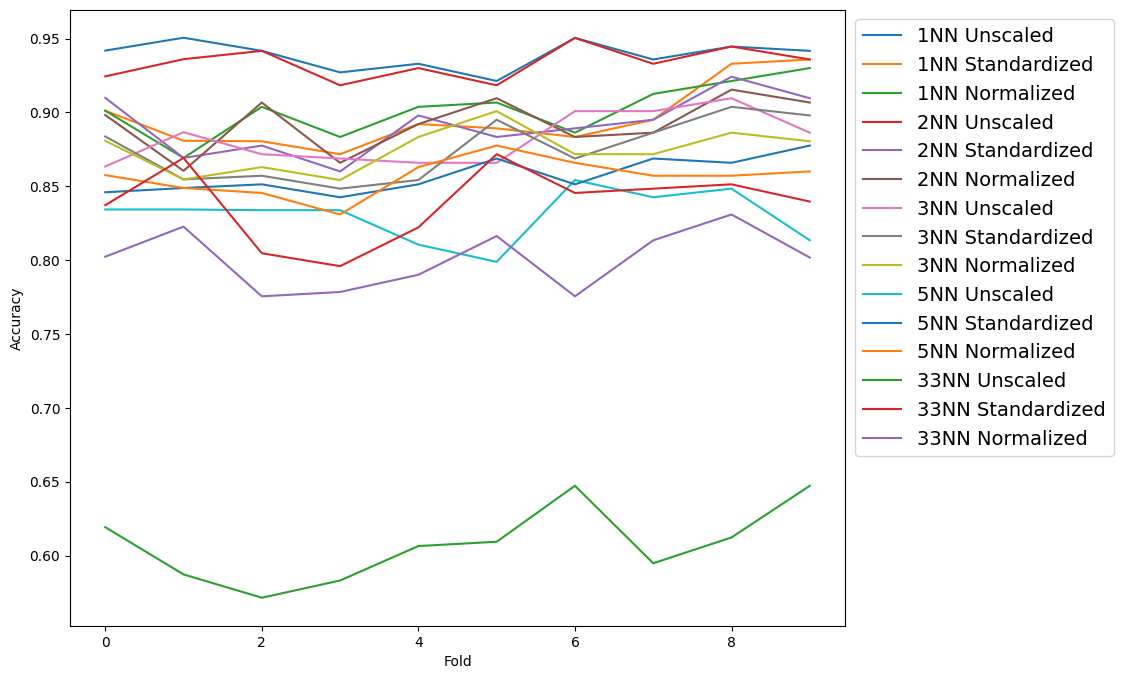

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(scores_1_unscaled, label = '1NN Unscaled')
plt.plot(scores_1_std, label = '1NN Standardized')
plt.plot(scores_1_norm, label = '1NN Normalized')

plt.plot(scores_2_unscaled, label = '2NN Unscaled')
plt.plot(scores_2_std, label = '2NN Standardized')
plt.plot(scores_2_norm, label = '2NN Normalized')

plt.plot(scores_3_unscaled, label = '3NN Unscaled')
plt.plot(scores_3_std, label = '3NN Standardized')
plt.plot(scores_3_norm, label = '3NN Normalized')

plt.plot(scores_5_unscaled, label = '5NN Unscaled')
plt.plot(scores_5_std, label = '5NN Standardized')
plt.plot(scores_5_norm, label = '5NN Normalized')

plt.plot(scores_33_unscaled, label = '33NN Unscaled')
plt.plot(scores_33_std, label = '33NN Standardized')
plt.plot(scores_33_norm, label = '33NN Normalized')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1), fontsize = 14)

plt.show()

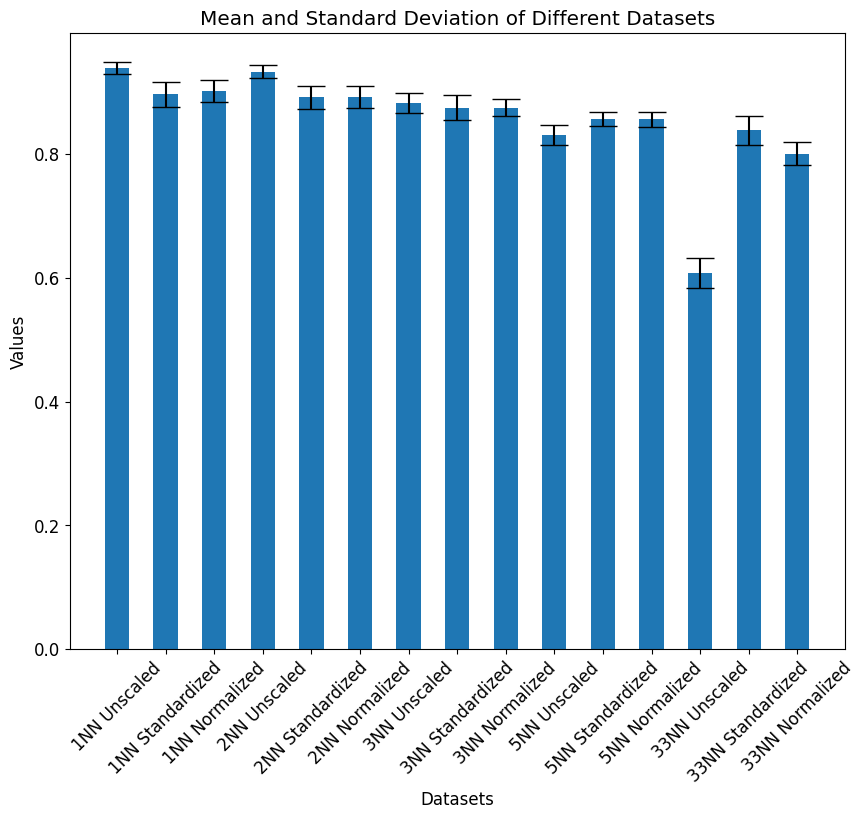

In [ ]:
# Calculate mean and standard deviation for each data set
scores = [scores_1_unscaled, scores_1_std, scores_1_norm,
          scores_2_unscaled, scores_2_std, scores_2_norm,
          scores_3_unscaled, scores_3_std, scores_3_norm,
          scores_5_unscaled, scores_5_std, scores_5_norm,
          scores_33_unscaled, scores_33_std, scores_33_norm]

mean_values = [np.mean(score) for score in scores]
std_dev_values = [np.std(score) for score in scores]

# Labels for the bars
labels = ['1NN Unscaled', '1NN Standardized', '1NN Normalized',
          '2NN Unscaled', '2NN Standardized', '2NN Normalized',
          '3NN Unscaled', '3NN Standardized', '3NN Normalized',
          '5NN Unscaled', '5NN Standardized', '5NN Normalized',
          '33NN Unscaled', '33NN Standardized', '33NN Normalized']

# Bar width
bar_width = 0.5

# Plotting
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (10, 8))

# Bar plots with error bars representing standard deviations
ax.bar(labels, mean_values, bar_width, yerr=std_dev_values, capsize=10)

# Adding labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Deviation of Different Datasets')

# Show the plot
plt.xticks(rotation = 45)
plt.show()

###**Evaluation**

The best model from above was chosen by considering all the information from the outputs and the graphs. Then it was trained on the whole training set, and evaluated on the test set using the accuracy and confusion matrix.

In [ ]:
model = KNeighborsClassifier(n_neighbors = 2)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(accuracy_score(y_test, pred))

0.9382284382284383


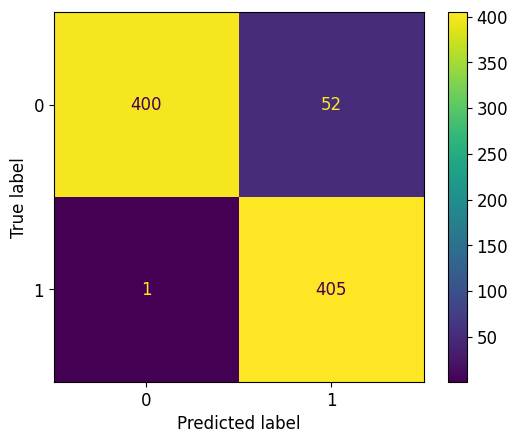

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels = model.classes_)

plt.show()

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9382284382284383
Precision: 0.8862144420131292
Recall: 0.9975369458128078
F1 Score: 0.9385863267670916
Confusion Matrix:
[[400  52]
 [  1 405]]


---

# End of Notebook

© 2023 The Coding School, All rights reserved